### JayMichChi Part 2 Capstone
### Goal: Jays EDA and Data Munching.



### EDA
I am going to explore my data using a variety of tools to reduce the computational lift.

In [1]:
# Loading 700MB dataset from my hard drive

import pandas as pd
df1 = pd.read_csv('jm_cap.csv', index_col=0)

/Users/ugp/anaconda2/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (30,35,36,38,55,56) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
from sklearn.preprocessing import LabelEncoder
LabelEncoder().fit_transform(df1['TOR_F_SCALE'])

/Users/ugp/anaconda2/lib/python2.7/site-packages/numpy/lib/arraysetops.py:200: FutureWarning: numpy not_equal will not check object identity in the future. The comparison did not return the same result as suggested by the identity (`is`)) and will change.
  flag = np.concatenate(([True], aux[1:] != aux[:-1]))


array([0, 0, 0, ..., 0, 0, 0])

In [3]:

LabelEncoder().fit_transform(df1['EVENT_TYPE'])
df1['EVENT_TYPE'].unique()

array(['Drought', 'Flood', 'Heavy Snow', 'Heat', 'Dense Fog', 'Ice Storm',
       'High Wind', 'Winter Storm', 'WINTER WEATHER', 'Heavy Rain',
       'Marine Thunderstorm Wind', 'Storm Surge/Tide', 'High Surf',
       'Blizzard', 'Cold/Wind Chill', 'Frost/Freeze', 'Strong Wind',
       'Wildfire', 'Rip Current', 'Dust Storm', 'Extreme Cold/Wind Chill',
       'Waterspout', 'Debris Flow', 'Funnel Cloud', 'Hail',
       'Thunderstorm Wind', 'Winter Weather', 'Flash Flood', 'Avalanche',
       'Tornado', 'Sleet', 'Lightning', 'Dust Devil', 'Tropical Storm',
       'Marine Hail', 'Volcanic Ash', 'Hurricane (Typhoon)', 'Seiche',
       'Lake-Effect Snow', 'Marine High Wind', 'Freezing Fog',
       'Coastal Flood', 'Dense Smoke', 'Tsunami', 'Landslide',
       'Astronomical Low Tide', 'Marine Strong Wind', 'Lakeshore Flood',
       'Excessive Heat', 'Tropical Depression', 'Hurricane',
       'Marine Tropical Storm', 'Sneakerwave', 'Marine Dense Fog'], dtype=object)

## For the purposes of this project, I have over 900,000 rows of data and 62 unique columns.  After some EDA on the data performed earlier, i have been able to identify reduce some features that will allow me to run my models more efficiently without hitting my CPU. 

## For the primary feature series "Event Types", there are 58 different events, ranging from Tornado's, to Seiche's (which if you didn't know is "a temporary disturbance or oscillation in the water level of a lake or partially enclosed body of water, especially one caused by changes in atmospheric pressure.".   

## I will be running models for top key event types, with the goal of predicting the absolute and probability of costs, damage, fatalities or injuries for selected event types.  

## Time to consolidate this feature set. There are far to many subclassifications (e.g. Hurricane, and Hurricane Typhoon, and Winter Weather, Blizzard,  WINTER WEATHER)



In [4]:
#1 Drought Dataset
data1=df1[(df1.EVENT_TYPE == 'Heat') | (df1.EVENT_TYPE == 'Excessive Heat') | (df1.EVENT_TYPE == 'Drought')]

data1.EVENT_TYPE = data1.EVENT_TYPE.str.replace('Excessive Heat','Drought') 
data1.EVENT_TYPE = data1.EVENT_TYPE.str.replace('Heat','Drought') 
print data1.EVENT_TYPE.unique()
data1.to_csv('data1.csv')

/Users/ugp/anaconda2/lib/python2.7/site-packages/pandas/core/generic.py:2701: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


['Drought']


In [5]:
#2 TOrnado Dataset

data2=df1[(df1.EVENT_TYPE == 'Tornado') | (df1.EVENT_TYPE == 'Funnel Cloud') ]
data2.EVENT_TYPE = data2.EVENT_TYPE.str.replace('Funnel Cloud','Tornado')
print data2.EVENT_TYPE.unique()
data2.to_csv('data2.csv')

['Tornado']


In [6]:
#3 Flood Dataset
data3=df1[(df1.EVENT_TYPE == 'Flash Flood') | (df1.EVENT_TYPE == 'Flood') | (df1.EVENT_TYPE == 'Coastal Flood') ]
data3.EVENT_TYPE = data3.EVENT_TYPE.str.replace('Flash Flood','Flood')
data3.EVENT_TYPE = data3.EVENT_TYPE.str.replace('Coastal Flood','Flood')
data3.EVENT_TYPE = data3.EVENT_TYPE.str.replace('Lakeshore Flood','Flood')
print data3.EVENT_TYPE.unique()
data3.to_csv('data3.csv')

['Flood']


In [7]:
#6 Rename Winter Weather

data6=df1[(df1.EVENT_TYPE == 'Cold/Wind Chill') | (df1.EVENT_TYPE == 'Avalanche') | (df1.EVENT_TYPE == 'Winter Storm') | \
           (df1.EVENT_TYPE == 'Heavy Snow') | (df1.EVENT_TYPE == 'Extreme Cold/Wind Chill') | (df1.EVENT_TYPE == 'Ice Storm') | \
           (df1.EVENT_TYPE == 'Winter Weather') | (df1.EVENT_TYPE == 'Blizzard') | (df1.EVENT_TYPE == 'WINTER WEATHER') | \
           (df1.EVENT_TYPE == 'Hail') | (df1.EVENT_TYPE == 'Freezing Fog') | (df1.EVENT_TYPE == 'Frost/Freeze') | \
           (df1.EVENT_TYPE == 'Sleet') | (df1.EVENT_TYPE == 'Marine Hail') | (df1.EVENT_TYPE == 'High Snow') | \
           (df1.EVENT_TYPE == 'Lake-Effect Snow') 
         ]

data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Cold/Wind Chill','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Winter Weather','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Avalanche','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Blizzard','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Heavy Snow','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Hail','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Frost/Freeze','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Freezing Fog','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Ice Storm','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Lake-Effect Snow','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Sleet','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Extreme Winter Storm','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('High Snow','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('WINTER WEATHER','Winter Storm')
data6.EVENT_TYPE = data6.EVENT_TYPE.str.replace('Marine ','')

print data6.EVENT_TYPE.unique()

data6.to_csv('data6.csv')

['Winter Storm']


In [8]:
# 7 Hurricane Dataset
data7=df1[(df1.EVENT_TYPE == 'Hurricane (Typhoon)') | (df1.EVENT_TYPE == 'Hurricane')]
data7.EVENT_TYPE= data7.EVENT_TYPE.str.replace("Typhoon",'')
data7.EVENT_TYPE= data7.EVENT_TYPE.str.replace("(",'')
data7.EVENT_TYPE= data7.EVENT_TYPE.str.replace(")",'')
data7.EVENT_TYPE= data7.EVENT_TYPE.str.replace(" ",'')
data7.EVENT_TYPE= data7.EVENT_TYPE.str.replace('High Rain','Hurricane')

print data7.EVENT_TYPE.unique()
data7.to_csv('data7.csv')

['Hurricane']


In [9]:
# 9 Tropical Storm dataset
data9=df1[(df1.EVENT_TYPE == 'Tropical Storm') | (df1.EVENT_TYPE == 'Marine Tropical Storm') | (df1.EVENT_TYPE == 'Tropical Depression')]
data9.EVENT_TYPE = data9.EVENT_TYPE.str.replace('Marine ','')
data9.EVENT_TYPE = data9.EVENT_TYPE.str.replace('Tropical Depression','Tropical Storm')
print data9.EVENT_TYPE.unique()
data9.to_csv('data9.csv')

['Tropical Storm']


In [10]:
# 11 High Wind Datatset

data11=df1[(df1.EVENT_TYPE == 'Thunderstorm Wind') | (df1.EVENT_TYPE == 'Marine Strong Wind') | (df1.EVENT_TYPE == 'Marine Thunderstorm Wind') | \
           (df1.EVENT_TYPE == 'Marine High Wind') | (df1.EVENT_TYPE == 'Strong Wind') | (df1.EVENT_TYPE == 'Heavy Wind') | \
           (df1.EVENT_TYPE == 'High Wind')]
data11.EVENT_TYPE = data11.EVENT_TYPE.str.replace('Marine Strong Wind','High Wind')
data11.EVENT_TYPE = data11.EVENT_TYPE.str.replace('Marine High Wind','High Wind')
data11.EVENT_TYPE = data11.EVENT_TYPE.str.replace('Marine Thunderstorm Wind','High Wind')
data11.EVENT_TYPE = data11.EVENT_TYPE.str.replace('Thunderstorm Wind','High Wind')
data11.EVENT_TYPE = data11.EVENT_TYPE.str.replace('Strong Wind','High Wind')
data11.EVENT_TYPE = data11.EVENT_TYPE.str.replace('Heavy Wind','High Wind')
print data11.EVENT_TYPE.unique()
data11.to_csv('data11.csv')

['High Wind']


In [11]:
# 14 Rip Current Dataset

data14=df1[(df1.EVENT_TYPE == 'High Surf') | (df1.EVENT_TYPE == 'Storm Surge/Tide') | (df1.EVENT_TYPE == 'Rip Current')| (df1.EVENT_TYPE == 'Astronomical Low Tide') ]
data14.EVENT_TYPE = data14.EVENT_TYPE.str.replace('Storm Surge/Tide','Rip Current')
data14.EVENT_TYPE = data14.EVENT_TYPE.str.replace('High Surf','Rip Current')
data14.EVENT_TYPE = data14.EVENT_TYPE.str.replace('Astronomical Low Tide','Rip Current')
print data14.EVENT_TYPE.unique()
data14.to_csv('data14.csv')

['Rip Current']


## Now I am going to clean up my 600,000 row dataframe 

In [12]:
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Excessive Heat','Drought') 
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Heat','Drought') 

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Funnel Cloud','Tornado')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Flash Flood','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Coastal Flood','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Lakeshore Flood','Flood')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Cold/Wind Chill','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Winter Weather','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Avalanche','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Blizzard','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Heavy Snow','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Hail','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Frost/Freeze','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Freezing Fog','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Ice Storm','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Lake-Effect Snow','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Sleet','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Extreme Winter Storm','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('High Snow','Winter Storm')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('WINTER WEATHER','Winter Storm')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dust Devil','Dust Storm')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine ','')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Tropical Depression','Tropical Storm')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine Strong Wind','High Wind')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine High Wind','High Wind')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Marine Thunderstorm Wind','High Wind')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Thunderstorm Wind','High Wind')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Strong Wind','High Wind')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Heavy Wind','High Wind')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Seiche','Flood')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Storm Surge/Tide','Rip Current')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('High Surf','Rip Current')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Astronomical Low Tide','Rip Current')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Sneakerwave','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Debris Flow','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dense Smoke','Wildfire')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('()','')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Volcanic Ash','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dust Storm','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dust Devil','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Northern Lights','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Debris Flow','OTHER')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Dense Fog','OTHER')

df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace("Typhoon",'')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace("(",'')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace(")",'')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('High Rain','Hurricane')
df1.EVENT_TYPE = df1.EVENT_TYPE.str.replace('Hurricane ','Hurricane')

print df1.EVENT_TYPE.unique()

['Drought' 'Flood' 'Winter Storm' 'OTHER' 'High Wind' 'Heavy Rain'
 'Rip Current' 'Wildfire' 'Waterspout' 'Tornado' 'Lightning'
 'Tropical Storm' 'Hurricane' 'Tsunami' 'Landslide']


In [13]:
LabelEncoder().fit_transform(df1['STATE'])
df1['STATE'].unique()

array(['COLORADO', 'TEXAS', 'CALIFORNIA', 'NEW MEXICO', 'GEORGIA',
       'FLORIDA', 'OREGON', 'ARIZONA', 'UTAH', 'WASHINGTON', 'IDAHO',
       'PENNSYLVANIA', 'NEBRASKA', 'KANSAS', 'INDIANA', 'ILLINOIS',
       'AMERICAN SAMOA', 'NEW JERSEY', 'VIRGINIA', 'MARYLAND', 'KENTUCKY',
       'MISSOURI', 'VERMONT', 'NEW YORK', 'MASSACHUSETTS',
       'GULF OF MEXICO', 'MONTANA', 'WEST VIRGINIA', 'DELAWARE',
       'MICHIGAN', 'OHIO', 'HAWAII', 'ATLANTIC SOUTH', 'ALASKA',
       'NEW HAMPSHIRE', 'RHODE ISLAND', 'CONNECTICUT', 'NORTH CAROLINA',
       'MAINE', 'SOUTH DAKOTA', 'TENNESSEE', 'DISTRICT OF COLUMBIA',
       'NEVADA', 'WISCONSIN', 'OKLAHOMA', 'IOWA', 'ARKANSAS',
       'SOUTH CAROLINA', 'NORTH DAKOTA', 'WYOMING', 'PUERTO RICO',
       'ALABAMA', 'MISSISSIPPI', 'MINNESOTA', 'LOUISIANA', 'GUAM',
       'ATLANTIC NORTH', 'E PACIFIC', 'HAWAII WATERS', 'VIRGIN ISLANDS',
       'LAKE MICHIGAN', 'LAKE ERIE', 'LAKE ST CLAIR', 'LAKE HURON',
       'LAKE ONTARIO', 'ST LAWRENCE R', 'LAKE SUPERI

In [14]:
df1.TOR_F_SCALE = df1.TOR_F_SCALE.apply(lambda x: str(x))

In [15]:
df1['TOR_F_SCALE'] = df1['TOR_F_SCALE'].apply(lambda x: x.replace(' ', ''))

In [16]:
LabelEncoder().fit_transform(df1['TOR_F_SCALE'])
df1['TOR_F_SCALE'].unique()

array(['nan', 'F1', 'F0', 'F2', 'F3', 'F4', 'EF3', 'EF1', 'EF0', 'EF2',
       'EF4', 'EF5'], dtype=object)

##  Now going to do some further EDA on my EVENT_TYPE datasets to see of crop/property damage, casualities and fatalities.

In [17]:
# Want to add a column with a combination of injuries and deaths called casualties
df1['CASUALTIES'] = pd.DataFrame(df1.INJURIES_DIRECT + df1.INJURIES_INDIRECT + df1.DEATHS_DIRECT + df1.DEATHS_INDIRECT)
df1['TOTAL_DEATHS'] = pd.DataFrame(df1.DEATHS_DIRECT + df1.DEATHS_INDIRECT)
df1['TOTAL_INJURIES'] = pd.DataFrame(df1.INJURIES_DIRECT + df1.INJURIES_INDIRECT)

In [18]:
df1.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,LAST_MOD_TIME,LAST_CERT_DATE,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE,CASUALTIES,TOTAL_DEATHS,TOTAL_INJURIES
0,200301,1,0,200301,31,2359,146513,5338259,COLORADO,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
1,200301,1,0,200301,31,2359,147987,5344607,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
2,200301,1,0,200301,31,2359,147987,5344606,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
3,200301,1,0,200301,31,2359,147987,5344605,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0
4,200301,1,0,200301,31,2359,147987,5344604,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0


In [19]:
df1.groupby('EPISODE_ID').TOTAL_INJURIES.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EPISODE_ID,count,min,max,mean,sum
0,23202,25,0,2400,96.360000,2409
1,50455,119,0,800,16.815126,2001
2,49972,32,0,1150,36.031250,1153
3,10217,22,0,519,43.318182,953
4,178038,5,0,700,156.000000,780
5,71079,3,73,300,157.666667,473
6,79351,1,450,450,450.000000,450
7,216163,1,437,437,437.000000,437
8,49915,165,0,200,2.563636,423
9,10321,39,0,60,10.461538,408


In [67]:
df1.loc[df1['EPISODE_ID'] == 23202, 'EVENT_TYPE'] = 'Hurricane'
df1.loc[df1['EPISODE_ID'] == 50455, 'EVENT_TYPE'] = 'Tornado'
df1.loc[df1['EPISODE_ID'] == 49972, 'EVENT_TYPE'] = 'Tornado'
df1.loc[df1['EPISODE_ID'] == 49915, 'EVENT_TYPE'] = 'Winter Storm'

In [66]:
df1[df1.EPISODE_ID == 57428]

,EVENT_TYPE,EVENT_ID,EPISODE_ID,DATE,CZ_NAME,STATE,INJURIES_DIRECT,INJURIES_INDIRECT,TOTAL_INJURIES,DEATHS_DIRECT,...,DAMAGE_CROPS,COMBINED_DAMAGE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,EPISODE_NARRATIVE,EVENT_NARRATIVE,YEAR,MONTH_NAME
56042,Drought,372751,57428,2011-07-17,ST. LOUIS (C),MISSOURI,222,0,222,5,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56044,Drought,372750,57428,2011-07-17,ST. LOUIS,MISSOURI,167,0,167,3,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56088,Drought,372754,57428,2011-07-17,WARREN,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56089,Drought,372755,57428,2011-07-17,WASHINGTON,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56090,Drought,372744,57428,2011-07-17,OSAGE,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56091,Drought,372752,57428,2011-07-17,STE. GENEVIEVE,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56092,Drought,372749,57428,2011-07-17,ST. FRANCOIS,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56093,Drought,372747,57428,2011-07-17,ST. CHARLES,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56094,Drought,372746,57428,2011-07-17,REYNOLDS,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July
56096,Drought,372743,57428,2011-07-17,MONTGOMERY,MISSOURI,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,A major Heat Wave started on July 17th and con...,NaN,2011,July


In [20]:
df1.groupby('EVENT_TYPE').TOTAL_INJURIES.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,Tornado,20233,0,1150,0.652301,13198
1,Drought,44911,0,519,0.227183,10203
2,Winter Storm,269358,0,300,0.022372,6026
3,High Wind,213416,0,100,0.018246,3894
4,Hurricane,989,0,2400,3.423660,3386
5,Lightning,8044,0,40,0.310293,2496
6,Wildfire,3714,0,90,0.384760,1429
7,OTHER,6458,0,62,0.164292,1061
8,Flood,64342,0,136,0.013226,851
9,Rip Current,6078,0,55,0.085719,521


In [21]:
df1.groupby('EPISODE_ID').TOTAL_DEATHS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EPISODE_ID,count,min,max,mean,sum
0,49972,32,0,161,5.062500,162
1,50455,119,0,52,1.252101,149
2,50516,83,0,27,1.204819,100
3,199630,4,1,34,12.250000,49
4,214583,8,0,30,5.750000,46
5,220620,15,0,14,2.800000,42
6,70044,15,0,23,2.600000,39
7,75831,2,1,37,19.000000,38
8,23202,25,0,12,1.440000,36
9,49915,165,0,8,0.200000,33


In [22]:
df1.groupby('EVENT_TYPE').TOTAL_DEATHS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,Winter Storm,269358,0,10,0.005350,1441
1,Drought,44911,0,37,0.029770,1337
2,Tornado,20233,0,161,0.056788,1149
3,Flood,64342,0,23,0.014594,939
4,High Wind,213416,0,7,0.003261,696
5,Rip Current,6078,0,12,0.097236,591
6,Lightning,8044,0,3,0.050099,403
7,OTHER,6458,0,14,0.023227,150
8,Wildfire,3714,0,19,0.036349,135
9,Hurricane,989,0,10,0.095046,94


# Total Casualities from Tornados

In [23]:

torid1= df1[df1.EVENT_TYPE =='Tornado'].DEATHS_INDIRECT.sum()
torid2= df1[df1.EVENT_TYPE =='Tornado'].DEATHS_DIRECT.sum()
torid3= df1[df1.EVENT_TYPE =='Tornado'].INJURIES_DIRECT.sum()
torid4= df1[df1.EVENT_TYPE =='Tornado'].INJURIES_INDIRECT.sum()

In [24]:
TORSUM = torid1 + torid2 + torid3 + torid4
print TORSUM

14347


In [25]:
%matplotlib inline

In [26]:

d = pd.DataFrame(df1.groupby('EVENT_TYPE').TOTAL_DEATHS.sum()).sort_values('TOTAL_DEATHS', axis=0, ascending=False)
d = d[d['TOTAL_DEATHS'] > 100 ]

i = pd.DataFrame(df1.groupby('EVENT_TYPE').TOTAL_INJURIES.sum()).sort_values('TOTAL_INJURIES', axis=0, ascending=False)
i = i[i['TOTAL_INJURIES'] > 100 ]


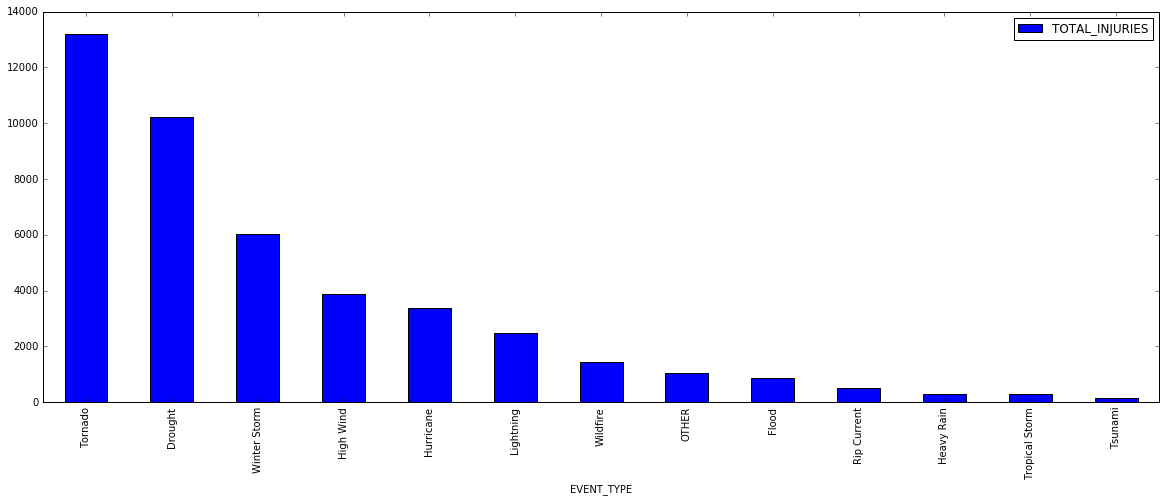

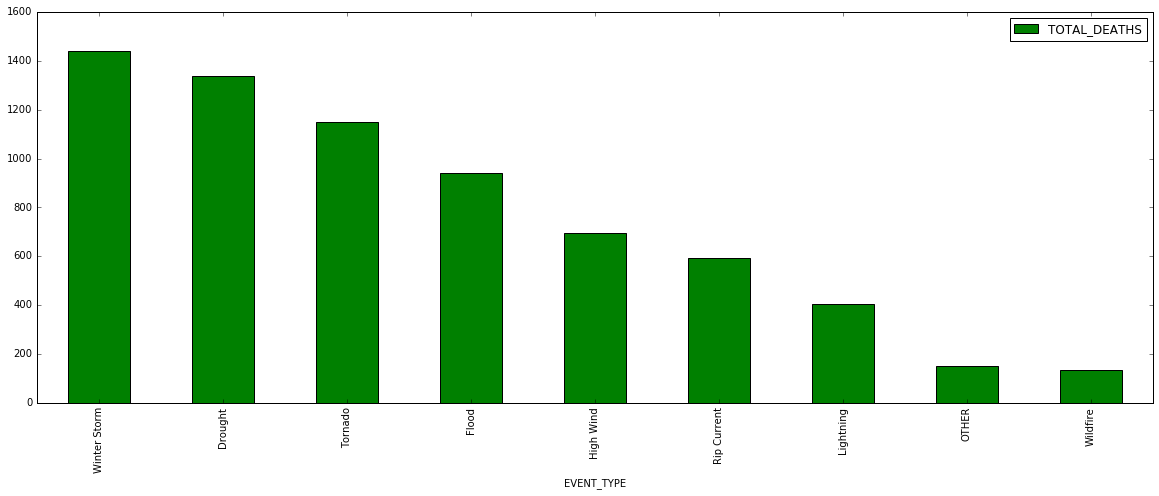

In [27]:

i.plot(kind='bar',figsize=(20,7))
d.plot(kind='bar',color = 'green',figsize=(20,7))

### More Data Cleaning.....

In [28]:
# I may need to combine a few dataSeries to get a date
df1['DATE'] = pd.to_datetime(df1.BEGIN_YEARMONTH*100+df1.BEGIN_DAY,format='%Y%m%d',errors='ignore')

In [29]:
def value_to_float(x):
    if type(x) == float or type(x) == int:
        return x
    if 'K' in x:
        if len(x) > 1:
            return float(x.replace('K', '')) * 1000
        return 1000.0
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000000.0
    if 'B' in x:
        return float(x.replace('B', '')) * 1000000000
    return 0.0

In [30]:
df1.DAMAGE_CROPS.fillna(value=0.0, inplace=True)
df1.DAMAGE_CROPS = df1.DAMAGE_CROPS.apply(value_to_float)

In [31]:
df1.DAMAGE_PROPERTY.fillna(value=0.0, inplace=True)
df1.DAMAGE_PROPERTY = df1.DAMAGE_PROPERTY.apply(value_to_float)

In [32]:
df1['COMBINED_DAMAGE'] = pd.DataFrame(df1.DAMAGE_PROPERTY + df1.DAMAGE_CROPS)

In [33]:
df1.groupby('EPISODE_ID').DAMAGE_CROPS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EPISODE_ID,count,min,max,mean,sum
0,64742,51,45000000.0,9.000000e+07,4.676471e+07,2.385000e+09
1,198432,47,5000000.0,9.000000e+07,3.204255e+07,1.506000e+09
2,51783,24,0.0,1.050000e+09,4.375000e+07,1.050000e+09
3,40184,51,20000000.0,4.000000e+07,2.039216e+07,1.040000e+09
4,203990,46,0.0,1.000000e+09,2.173913e+07,1.000000e+09
5,68979,35,0.0,7.260000e+07,2.804286e+07,9.815000e+08
6,78171,45,21000000.0,2.100000e+07,2.100000e+07,9.450000e+08
7,7401,44,300000.0,7.000000e+08,1.701136e+07,7.485000e+08
8,1030,4,3400000.0,5.686000e+08,1.772000e+08,7.088000e+08
9,43007,9,500000.0,7.000000e+08,7.855556e+07,7.070000e+08


In [34]:
df1.groupby('EVENT_TYPE').DAMAGE_CROPS.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(11)

,EVENT_TYPE,count,min,max,mean,sum
0,Drought,44911,0.0,1.050000e+09,4.026509e+05,1.808345e+10
1,Winter Storm,269358,0.0,5.686000e+08,2.107351e+04,5.676319e+09
2,Flood,64342,0.0,5.000000e+08,7.878851e+04,5.069411e+09
3,Hurricane,989,0.0,4.230000e+08,2.942956e+06,2.910584e+09
4,High Wind,213416,0.0,7.500000e+07,5.862128e+03,1.251072e+09
5,Tropical Storm,3545,0.0,1.015000e+08,1.986519e+05,7.042210e+08
6,Heavy Rain,10478,0.0,1.900000e+08,3.595109e+04,3.766955e+08
7,Wildfire,3714,0.0,9.000000e+07,7.006665e+04,2.602275e+08
8,Tornado,20233,0.0,7.000000e+07,1.120085e+04,2.266267e+08
9,OTHER,6458,0.0,2.000000e+07,4.335708e+03,2.800000e+07


In [35]:
df1.groupby('EPISODE_ID').DAMAGE_PROPERTY.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EPISODE_ID,count,min,max,mean,sum
0,203478,1,1.150000e+11,1.150000e+11,1.150000e+11,1.150000e+11
1,198567,10,0.000000e+00,1.790000e+10,3.130300e+09,3.130300e+10
2,68471,50,0.000000e+00,7.500000e+09,4.991818e+08,2.495909e+10
3,198565,27,1.700000e+06,3.560000e+09,6.270148e+08,1.692940e+10
4,23202,25,0.000000e+00,4.000000e+09,5.372432e+08,1.343108e+10
5,198568,3,2.250000e+09,5.630000e+09,3.753333e+09,1.126000e+10
6,199954,4,0.000000e+00,1.000000e+10,2.500000e+09,1.000000e+10
7,198566,8,3.400000e+06,2.940000e+09,9.184250e+08,7.347400e+09
8,198432,47,2.000000e+05,7.500000e+08,1.251979e+08,5.884300e+09
9,178038,5,8.200000e+06,3.000000e+09,1.084520e+09,5.422600e+09


In [36]:
df1.groupby('EVENT_TYPE').DAMAGE_PROPERTY.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EVENT_TYPE,count,min,max,mean,sum
0,Flood,64342,0.0,1.150000e+11,2.577800e+06,1.658608e+11
1,Hurricane,989,0.0,1.000000e+10,7.672125e+07,7.587732e+10
2,Rip Current,6078,0.0,1.790000e+10,8.906223e+06,5.413202e+10
3,Tornado,20233,0.0,2.800000e+09,1.070464e+06,2.165870e+10
4,Winter Storm,269358,0.0,1.800000e+09,6.905104e+04,1.859945e+10
5,High Wind,213416,0.0,1.500000e+09,7.221144e+04,1.541108e+10
6,Wildfire,3714,0.0,1.040000e+09,1.881743e+06,6.988794e+09
7,Tropical Storm,3545,0.0,2.520000e+08,7.090450e+05,2.513564e+09
8,Drought,44911,0.0,2.500000e+08,4.313890e+04,1.937411e+09
9,Lightning,8044,0.0,1.500000e+07,6.840777e+04,5.502721e+08


In [37]:
df1.groupby('EPISODE_ID').COMBINED_DAMAGE.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EPISODE_ID,count,min,max,mean,sum
0,203478,1,1.150325e+11,1.150325e+11,1.150325e+11,1.150325e+11
1,198567,10,0.000000e+00,1.790000e+10,3.130300e+09,3.130300e+10
2,68471,50,0.000000e+00,7.500000e+09,4.991818e+08,2.495909e+10
3,198565,27,1.700000e+06,3.560000e+09,6.270148e+08,1.692940e+10
4,23202,25,0.000000e+00,4.000000e+09,5.372432e+08,1.343108e+10
5,198568,3,2.250000e+09,5.630000e+09,3.753333e+09,1.126000e+10
6,199954,4,0.000000e+00,1.000000e+10,2.500000e+09,1.000000e+10
7,198432,47,5.500000e+06,8.400000e+08,1.572404e+08,7.390300e+09
8,198566,8,3.400000e+06,2.940000e+09,9.184250e+08,7.347400e+09
9,178038,5,8.200000e+06,3.150000e+09,1.141520e+09,5.707600e+09


In [38]:
df1.groupby('EVENT_TYPE').COMBINED_DAMAGE.agg(['count','min', 'max', 'mean', 'sum']).sort_values('sum', axis=0, ascending=False).reset_index().head(10)

,EVENT_TYPE,count,min,max,mean,sum
0,Flood,64342,0.0,1.150325e+11,2.656589e+06,1.709302e+11
1,Hurricane,989,0.0,1.000000e+10,7.966421e+07,7.878790e+10
2,Rip Current,6078,0.0,1.790000e+10,8.906363e+06,5.413287e+10
3,Winter Storm,269358,0.0,1.800000e+09,9.012455e+04,2.427577e+10
4,Tornado,20233,0.0,2.800000e+09,1.081665e+06,2.188533e+10
5,Drought,44911,0.0,1.250000e+09,4.457898e+05,2.002087e+10
6,High Wind,213416,0.0,1.500000e+09,7.807357e+04,1.666215e+10
7,Wildfire,3714,0.0,1.046500e+09,1.951810e+06,7.249022e+09
8,Tropical Storm,3545,0.0,2.520000e+08,9.076969e+05,3.217785e+09
9,Heavy Rain,10478,0.0,1.900000e+08,7.419308e+04,7.773950e+08


In [39]:
%matplotlib inline

In [40]:
b = pd.DataFrame(df1.groupby('EVENT_TYPE').COMBINED_DAMAGE.sum()).sort_values('COMBINED_DAMAGE', axis=0, ascending=False)
b = b[b['COMBINED_DAMAGE'] > 100000000]

m = pd.DataFrame(df1.groupby('EVENT_TYPE').DAMAGE_PROPERTY.sum()).sort_values('DAMAGE_PROPERTY', axis=0, ascending=False)
m = m[m['DAMAGE_PROPERTY'] > 100 ]

q = pd.DataFrame(df1.groupby('EVENT_TYPE').DAMAGE_CROPS.sum()).sort_values('DAMAGE_CROPS', axis=0, ascending=False)
q = q[q['DAMAGE_CROPS'] > 100 ]



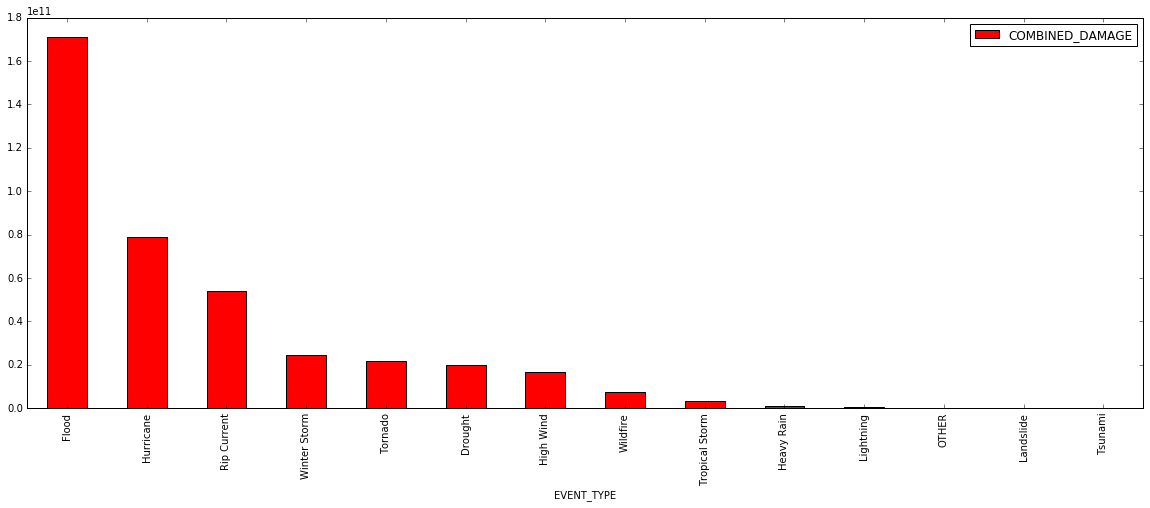

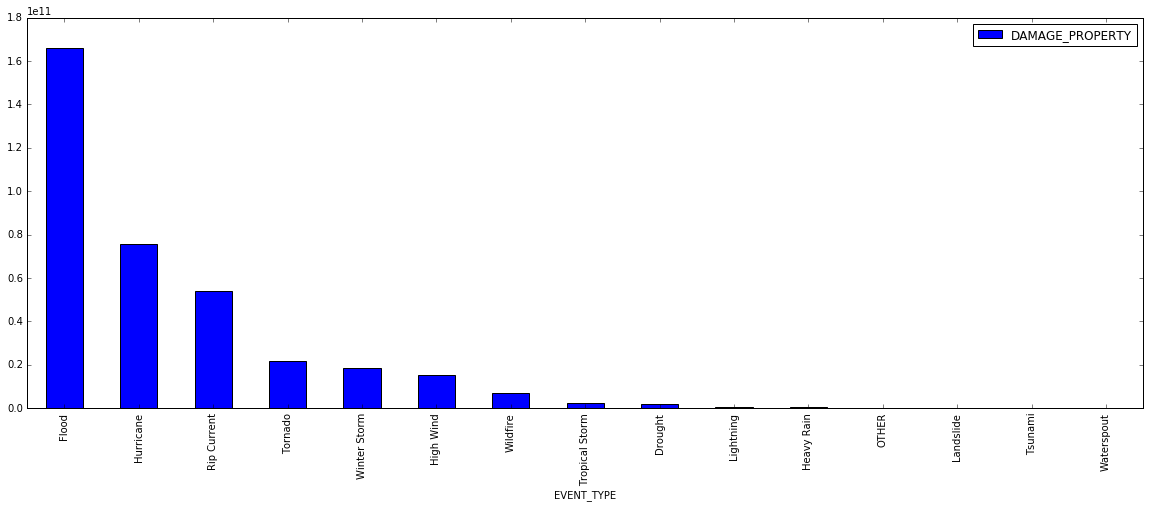

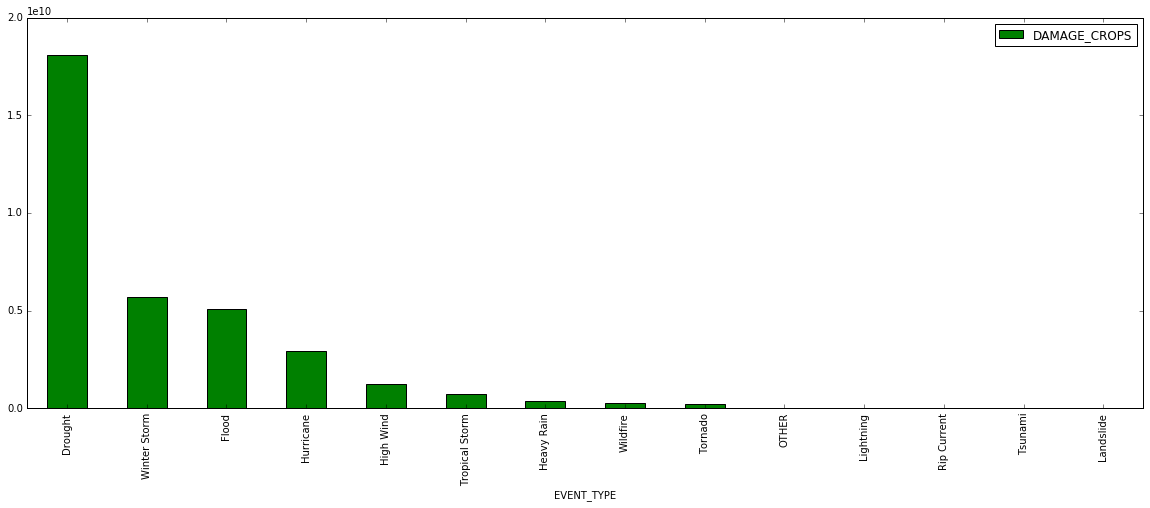

In [41]:
b.plot(kind='bar', color = 'Red',figsize=(20,7))
m.plot(kind='bar',figsize=(20,7))
q.plot(kind='bar',color = 'green',figsize=(20,7))

In [42]:
test1 = df1

In [43]:
test1.head()

,BEGIN_YEARMONTH,BEGIN_DAY,BEGIN_TIME,END_YEARMONTH,END_DAY,END_TIME,EPISODE_ID,EVENT_ID,STATE,STATE_FIPS,...,LAST_CERT_TIME,LAST_MOD,LAST_CERT,ADDCORR_FLG,ADDCORR_DATE,CASUALTIES,TOTAL_DEATHS,TOTAL_INJURIES,DATE,COMBINED_DAMAGE
0,200301,1,0,200301,31,2359,146513,5338259,COLORADO,8.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,2003-01-01,0.0
1,200301,1,0,200301,31,2359,147987,5344607,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,2003-01-01,0.0
2,200301,1,0,200301,31,2359,147987,5344606,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,2003-01-01,0.0
3,200301,1,0,200301,31,2359,147987,5344605,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,2003-01-01,0.0
4,200301,1,0,200301,31,2359,147987,5344604,TEXAS,48.0,...,NaN,NaN,NaN,NaN,NaN,0,0,0,2003-01-01,0.0


In [44]:
df1.drop(['BEGIN_YEARMONTH','BEGIN_TIME', 'END_YEARMONTH', 'END_DAY', 'END_TIME', 'STATE_FIPS',
         'CZ_TYPE','CZ_FIPS', 'BEGIN_DATE_TIME', 'CZ_TIMEZONE', 'END_DATE_TIME', 'SOURCE', 'MAGNITUDE', 'MAGNITUDE_TYPE',
         'TOR_OTHER_CZ_FIPS', 'TOR_OTHER_CZ_NAME', 'BEGIN_RANGE', 'BEGIN_AZIMUTH', 'BEGIN_LOCATION', 'END_RANGE', 'END_AZIMUTH',
          'END_LOCATION', 'BEGIN_LAT','BEGIN_LON' , 'END_LAT', 'END_LON','LAST_MOD_DATE', 'LAST_MOD_TIME', 'LAST_CERT_DATE', 'LAST_CERT_TIME',
          'LAST_MOD', 'LAST_CERT', 'ADDCORR_FLG','ADDCORR_DATE','BEGIN_DAY', 'WFO', 'FLOOD_CAUSE','TOR_OTHER_WFO','TOR_OTHER_CZ_STATE'
         ], axis=1, inplace=True)


In [45]:
df1.head()

,EPISODE_ID,EVENT_ID,STATE,YEAR,MONTH_NAME,EVENT_TYPE,CZ_NAME,INJURIES_DIRECT,INJURIES_INDIRECT,DEATHS_DIRECT,...,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,EPISODE_NARRATIVE,EVENT_NARRATIVE,CASUALTIES,TOTAL_DEATHS,TOTAL_INJURIES,DATE,COMBINED_DAMAGE
0,146513,5338259,COLORADO,2003,January,Drought,UPPER YAMPA RIVER BASIN,0,0,0,...,nan,NaN,NaN,January consisted of below normal precipitatio...,NaN,0,0,0,2003-01-01,0.0
1,147987,5344607,TEXAS,2003,January,Drought,ZAPATA,0,0,0,...,nan,NaN,NaN,NaN,Soil moisture values remain above normal. How...,0,0,0,2003-01-01,0.0
2,147987,5344606,TEXAS,2003,January,Drought,WILLACY,0,0,0,...,nan,NaN,NaN,NaN,Soil moisture values remain above normal. How...,0,0,0,2003-01-01,0.0
3,147987,5344605,TEXAS,2003,January,Drought,STARR,0,0,0,...,nan,NaN,NaN,NaN,Soil moisture values remain above normal. How...,0,0,0,2003-01-01,0.0
4,147987,5344604,TEXAS,2003,January,Drought,KENEDY,0,0,0,...,nan,NaN,NaN,NaN,Soil moisture values remain above normal. How...,0,0,0,2003-01-01,0.0


In [46]:
cols = ['EVENT_TYPE','EVENT_ID','EPISODE_ID','DATE','CZ_NAME','STATE','INJURIES_DIRECT','INJURIES_INDIRECT','TOTAL_INJURIES','DEATHS_DIRECT','DEATHS_INDIRECT','TOTAL_DEATHS','CASUALTIES','DAMAGE_PROPERTY','DAMAGE_CROPS','COMBINED_DAMAGE','CATEGORY','TOR_F_SCALE','TOR_LENGTH','TOR_WIDTH','EPISODE_NARRATIVE','EVENT_NARRATIVE','YEAR','MONTH_NAME']

In [47]:
df1 = df1[cols]  #    OR    df = df.ix[:, cols]

In [48]:
df1['CATEGORY']= df1['CATEGORY'].replace('NaN', 0)
df1['TOR_LENGTH']= df1['TOR_LENGTH'].replace('NaN', 0)
df1['TOR_WIDTH']= df1['TOR_WIDTH'].replace('NaN', 0)

In [51]:
df1['TOR_F_SCALE'].unique()

array(['nan', 'F1', 'F0', 'F2', 'F3', 'F4', 'EF3', 'EF1', 'EF0', 'EF2',
       'EF4', 'EF5'], dtype=object)

In [49]:
df1.head()

,EVENT_TYPE,EVENT_ID,EPISODE_ID,DATE,CZ_NAME,STATE,INJURIES_DIRECT,INJURIES_INDIRECT,TOTAL_INJURIES,DEATHS_DIRECT,...,DAMAGE_CROPS,COMBINED_DAMAGE,CATEGORY,TOR_F_SCALE,TOR_LENGTH,TOR_WIDTH,EPISODE_NARRATIVE,EVENT_NARRATIVE,YEAR,MONTH_NAME
0,Drought,5338259,146513,2003-01-01,UPPER YAMPA RIVER BASIN,COLORADO,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,January consisted of below normal precipitatio...,NaN,2003,January
1,Drought,5344607,147987,2003-01-01,ZAPATA,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January
2,Drought,5344606,147987,2003-01-01,WILLACY,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January
3,Drought,5344605,147987,2003-01-01,STARR,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January
4,Drought,5344604,147987,2003-01-01,KENEDY,TEXAS,0,0,0,0,...,0.0,0.0,0.0,nan,0.0,0.0,NaN,Soil moisture values remain above normal. How...,2003,January


In [50]:
#convert dataframe to csv

df1.to_csv('df2.csv')
#This worked!  Thank God this was successful on Tuesday school!
# 10 years worth of data (654313, 24)

### Bonus: Explain how you intend to evaluate your results. 
What tuning metric and evaluation approaches do you intend to use?
Clean> fit> run models, look at the results... 

Linear regression: Attempt to accurately predict the independent variable (casualities) by good fitting SSE / differential 

Logistic regression: Attempt to predict if I can say if a certain storm in a certain state, in a certain month would cause a causality. I would show classification accuracy score, confusion matrix coorelation number.

### Bonus Identify 1-2 additional datasets that may help you triangulate your findings. 
How might these relate to your data?

Could look at the aircraft incident reports from the NTSB site
May get an idea of crop damage in current dollar basis, perhaps rebase for inflation or the proper crop price in todays dollars, crop price website

### Useful Resources

- [Exploratory Data Analysis](http://insightdatascience.com/blog/eda-and-graphics-eli-bressert.html)
- [Best practices for data documentation](https://www.dataone.org/all-best-practices)